# Process Breast Cancer Data Prior to Pipeline Testing

## scRNA-seq

In [4]:
import scanpy as sc

matrix_file = 'data/scRNAseq/processed_counts/AllCells_normalised_count/matrix.mtx.gz'
features_file = 'data/scRNAseq/processed_counts/AllCells_normalised_count/features.tsv.gz'
barcodes_file = 'data/scRNAseq/processed_counts/AllCells_normalised_count/barcodes.tsv.gz'

adata = sc.read_10x_mtx(
    'data/scRNAseq/processed_counts/AllCells_normalised_count/',
    var_names = 'gene_ids',
    cache = True
)

print(adata)

AnnData object with n_obs × n_vars = 16423 × 45189
    var: 'gene_symbols', 'feature_types'


In [9]:
print(adata.X)

  (948, 2)	0.15014355
  (213, 3)	0.6257868
  (554, 3)	0.18878692
  (731, 3)	0.44076395
  (812, 3)	0.25355658
  (2000, 3)	0.41999105
  (2216, 3)	0.530073
  (2592, 3)	0.9142854
  (2626, 3)	0.13270265
  (2642, 3)	1.0629907
  (2763, 3)	0.08697578
  (2775, 3)	1.3649307
  (2884, 3)	0.5161075
  (2895, 3)	0.21088418
  (3441, 3)	0.1860151
  (12860, 3)	0.52080774
  (13718, 3)	1.1003486
  (14000, 3)	1.5748361
  (14167, 3)	0.7957494
  (14860, 3)	0.20339
  (14924, 3)	0.21998411
  (15074, 3)	0.15042867
  (5, 12)	0.96900576
  (19, 12)	1.0351545
  (25, 12)	0.62899977
  :	:
  (16319, 45188)	1.0314229
  (16326, 45188)	2.7567935
  (16327, 45188)	4.2198076
  (16333, 45188)	1.5016708
  (16335, 45188)	1.9401041
  (16339, 45188)	0.8056199
  (16344, 45188)	0.9046314
  (16352, 45188)	4.4830027
  (16356, 45188)	1.8159121
  (16359, 45188)	3.811967
  (16362, 45188)	4.0147815
  (16370, 45188)	0.39469627
  (16375, 45188)	3.918942
  (16378, 45188)	1.5775752
  (16384, 45188)	3.8869348
  (16385, 45188)	3.6169767
  (16

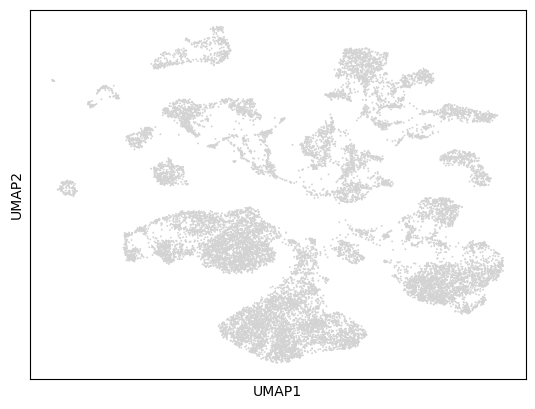

In [10]:
sc.pp.pca(adata)  # Perform PCA
sc.pp.neighbors(adata)  # Compute the neighborhood graph
sc.tl.umap(adata)  # Compute the UMAP
sc.pl.umap(adata)  # Plot the UMAP

In [18]:
# Check the shape of the matrix and the names
print(f"Shape of adata.X: {adata.X.shape}")
print(f"Number of genes (adata.var_names): {len(adata.var_names)}")
print(f"Number of cells (adata.obs_names): {len(adata.obs_names)}")

Shape of adata.X: (16423, 45189)
Number of genes (adata.var_names): 45189
Number of cells (adata.obs_names): 16423


In [23]:
import pandas as pd

# Convert the expression matrix to a DataFrame
df = pd.DataFrame(adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)

# Display the DataFrame
print(df)

                                 MIR1302-2HG  FAM138A  OR4F5  AL627309.1  \
4513_AAACCCAAGGTTAAAC                    0.0      0.0    0.0         0.0   
4513_AAACCCATCCTTCAGC                    0.0      0.0    0.0         0.0   
4513_AAACGAAAGTACAGAT                    0.0      0.0    0.0         0.0   
4513_AAACGAACAAGATGTA                    0.0      0.0    0.0         0.0   
4513_AAACGAATCACCACAA                    0.0      0.0    0.0         0.0   
...                                      ...      ...    ...         ...   
4660_4664_4676_TTTGGTTGTCATATGC          0.0      0.0    0.0         0.0   
4660_4664_4676_TTTGTTGAGAATCTAG          0.0      0.0    0.0         0.0   
4660_4664_4676_TTTGTTGAGACAGTCG          0.0      0.0    0.0         0.0   
4660_4664_4676_TTTGTTGAGACGTCCC          0.0      0.0    0.0         0.0   
4660_4664_4676_TTTGTTGCAGCTACCG          0.0      0.0    0.0         0.0   

                                 AL627309.3  AL627309.2  AL627309.4  \
4513_AAACCCAAGGT

In [24]:
df = df.T

df

,4513_AAACCCAAGGTTAAAC,4513_AAACCCATCCTTCAGC,4513_AAACGAAAGTACAGAT,4513_AAACGAACAAGATGTA,4513_AAACGAATCACCACAA,4513_AAACGAATCATGGAGG,4513_AAACGCTCACGAGGAT,4513_AAAGAACCACAGTCAT,4513_AAAGAACCACAGTCCG,4513_AAAGAACCAGACGATG,...,4660_4664_4676_TTTGGAGCAAACTAGA,4660_4664_4676_TTTGGAGCAGACAAGC,4660_4664_4676_TTTGGAGCAGACGCTC,4660_4664_4676_TTTGGAGCATAGTCAC,4660_4664_4676_TTTGGTTCAGTGTGGA,4660_4664_4676_TTTGGTTGTCATATGC,4660_4664_4676_TTTGTTGAGAATCTAG,4660_4664_4676_TTTGTTGAGACAGTCG,4660_4664_4676_TTTGTTGAGACGTCCC,4660_4664_4676_TTTGTTGCAGCTACCG
MIR1302-2HG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
FAM138A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
OR4F5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
AL627309.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
AL627309.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mm10---Rpl7a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
mm10---H2afz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
mm10---Rbm3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
mm10---Oaz1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0


In [25]:
df.to_csv('scRNAseq_countMatrix.csv', index = True)

## Bulk RNA-seq

In [79]:
import pandas as pd

file = 'data/RNAseq/GSE263089_norm_counts_FPKM_GRCh38.p13_NCBI.csv'
df = pd.read_csv(file) # index_col=0

df

,GeneID,GSM8185657,GSM8185658,GSM8185659,GSM8185660,GSM8185661,GSM8185662,GSM8185663,GSM8185664,GSM8185665,...,GSM8185681,GSM8185682,GSM8185683,GSM8185684,GSM8185685,GSM8185686,GSM8185687,GSM8185689,GSM8185690,GSM8185691
0,100287102,0.1047,0.2995,0.1759,0.05441,0.2076,0.154,0.1604,0.2854,0.1249,...,0.3900,0.1991,0.4432,0.08812,0.1899,0.1977,0.2024,0.1745,0.1943,0.1942
1,653635,5.3140,9.1990,6.2080,5.89400,9.0540,5.238,6.3200,7.9190,3.0910,...,11.5600,5.1450,7.2020,4.91000,6.6330,5.0770,5.7420,5.0260,7.1680,4.8980
2,102466751,1.6960,11.3200,9.3990,3.30500,10.0800,3.740,8.5710,7.9230,2.2760,...,12.6300,6.4500,5.3840,3.56800,9.2280,8.0040,2.4590,2.1200,1.1800,3.5390
3,107985730,0.0000,0.0000,0.0000,0.08353,0.0000,0.000,0.0000,0.1252,0.0000,...,0.0998,0.0000,0.0000,0.09019,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,100302278,0.0000,0.0000,0.0000,0.00000,0.0000,0.000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39371,4541,105.6000,52.4600,49.6900,99.90000,40.8600,43.600,65.7000,32.4600,78.0200,...,16.2600,49.1900,33.7500,14.51000,28.3300,50.4900,34.8000,40.7400,27.3600,47.8300
39372,4556,458.8000,217.5000,187.8000,415.50000,166.8000,182.700,221.1000,73.2100,302.8000,...,36.5700,196.3000,73.2200,48.52000,58.2000,201.2000,130.9000,183.9000,65.1400,186.0000
39373,4519,287.7000,239.0000,189.6000,166.50000,221.7000,213.200,298.5000,209.4000,362.9000,...,90.2600,262.5000,153.9000,83.82000,114.1000,151.8000,135.1000,128.0000,69.5600,202.1000
39374,4576,27.9600,63.3100,31.6900,81.71000,36.3700,13.760,23.2800,72.4500,77.3800,...,34.1700,30.7400,18.8600,22.06000,16.1600,35.4600,25.3400,24.7600,20.6700,44.9700


In [43]:
import mygene

# Initialize mygene
mg = mygene.MyGeneInfo()

mg

In [44]:
# Fetch gene symbols for Entrez IDs
query_result = mg.querymany(df.GeneID, scopes='entrezgene', fields='symbol', species='human')

1684 input query terms found no hit:	['107985721', '100133331', '107984841', '107984847', '107984849', '112267874', '107984868', '1053786


In [61]:
query_result

[{'query': '100287102',
  '_id': '100287102',
  '_score': 8.69928,
  'symbol': 'DDX11L1'},
 {'query': '653635', '_id': '653635', '_score': 8.69928, 'symbol': 'WASH7P'},
 {'query': '102466751',
  '_id': '102466751',
  '_score': 26.967766,
  'symbol': 'MIR6859-1'},
 {'query': '107985730',
  '_id': '107985730',
  '_score': 26.967766,
  'symbol': 'MIR1302-2HG'},
 {'query': '100302278',
  '_id': '100302278',
  '_score': 26.967766,
  'symbol': 'MIR1302-2'},
 {'query': '645520',
  '_id': '645520',
  '_score': 26.967766,
  'symbol': 'FAM138A'},
 {'query': '79501', '_id': '79501', '_score': 26.967766, 'symbol': 'OR4F5'},
 {'query': '100996442',
  '_id': '100996442',
  '_score': 8.69928,
  'symbol': 'WASH9P'},
 {'query': '729737',
  '_id': '729737',
  '_score': 26.967766,
  'symbol': 'LOC729737'},
 {'query': '102725121',
  '_id': '102725121',
  '_score': 8.69928,
  'symbol': 'DDX11L17'},
 {'query': '102723897',
  '_id': '102723897',
  '_score': 8.69928,
  'symbol': 'LOC102723897'},
 {'query': '1

In [49]:
# Create a mapping dictionary from Entrez ID to gene symbol
entrez_to_symbol = {item['query']: item['symbol'] for item in query_result if 'symbol' in item}

entrez_to_symbol

{'100287102': 'DDX11L1',
 '653635': 'WASH7P',
 '102466751': 'MIR6859-1',
 '107985730': 'MIR1302-2HG',
 '100302278': 'MIR1302-2',
 '645520': 'FAM138A',
 '79501': 'OR4F5',
 '100996442': 'WASH9P',
 '729737': 'LOC729737',
 '102725121': 'DDX11L17',
 '102723897': 'LOC102723897',
 '102465909': 'MIR6859-2',
 '112268260': 'LOC112268260',
 '729759': 'OR4F29',
 '100132287': 'LOC100132287',
 '105378947': 'LOC105378947',
 '101928626': 'LOC101928626',
 '113219467': 'MIR12136',
 '81399': 'OR4F16',
 '100288069': 'LOC100288069',
 '105378580': 'LINC01409',
 '400728': 'FAM87B',
 '79854': 'LINC00115',
 '643837': 'LINC01128',
 '107984850': 'LOC107984850',
 '284593': 'FAM41C',
 '284600': 'LOC284600',
 '100130417': 'LINC02593',
 '107985728': 'LOC107985728',
 '148398': 'SAMD11',
 '26155': 'NOC2L',
 '339451': 'KLHL17',
 '84069': 'PLEKHN1',
 '84808': 'PERM1',
 '57801': 'HES4',
 '9636': 'ISG15',
 '375790': 'AGRN',
 '100288175': 'LOC100288175',
 '105378948': 'LOC105378948',
 '401934': 'RNF223',
 '54991': 'C1orf15

In [62]:
len(entrez_to_symbol)

37692

In [76]:
# Ensure all keys in the dictionary are strings and strip any extra whitespace
entrez_to_symbol = {str(k).strip(): v.strip() for k, v in entrez_to_symbol.items()}

# Ensure all indices in the DataFrame are strings and strip any extra whitespace
df.index = df.index.map(str).map(str.strip)

In [80]:
# Convert GeneID column to string type (if not already)
df['GeneID'] = df['GeneID'].astype(str)

In [81]:
# Map the gene symbols to the GeneID column
df['GeneSymbol'] = df['GeneID'].map(entrez_to_symbol)

In [82]:
# Assuming 'df' is your DataFrame
rows_2000_to_2020 = df.iloc[2000:2021]

rows_2000_to_2020

,GeneID,GSM8185657,GSM8185658,GSM8185659,GSM8185660,GSM8185661,GSM8185662,GSM8185663,GSM8185664,GSM8185665,...,GSM8185682,GSM8185683,GSM8185684,GSM8185685,GSM8185686,GSM8185687,GSM8185689,GSM8185690,GSM8185691,GeneSymbol
2000,105371206,0.03974,0.03789,0.00000,0.03097,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.03344,0.00000,0.00000,0.000000,0.00000,0.05531,0.05529,LOC105371206
2001,100996732,0.20140,0.63990,0.14650,0.09590,0.29460,0.22560,0.37000,0.24820,0.06004,...,1.06400,0.25570,0.40470,0.25560,0.44350,0.113500,0.09323,0.14010,0.42020,LINC02802
2002,101060524,0.00000,0.00000,0.00000,0.00000,0.02197,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,LOC101060524
2003,101927333,0.00000,0.00000,0.00000,0.02770,0.02012,0.00000,0.01088,0.00000,0.00000,...,0.02253,0.06017,0.01994,0.01289,0.01118,0.034350,0.01974,0.03297,0.01648,CH17-125A10.2
2004,105371196,0.00000,0.00000,0.00000,0.07168,0.07812,0.00000,0.08450,0.00000,0.00000,...,0.00000,0.11680,0.07739,0.00000,0.00000,0.000000,0.00000,0.00000,0.12790,NaN
2005,730262,0.00000,0.00000,0.00000,0.05725,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.06984,0.00000,0.00000,0.00000,0.06934,0.000000,0.06122,0.10220,0.00000,PPIAL4E
2006,105373467,0.17180,0.43680,0.63470,1.33900,0.87550,1.11900,0.47350,0.80260,0.25610,...,0.43560,2.03600,0.09637,0.87240,1.02700,0.581200,0.47720,0.63760,0.39830,NaN
2007,101954267,0.69900,1.66600,2.81700,4.08600,3.85900,5.94600,1.92700,2.44900,0.93790,...,2.32600,5.76900,0.58810,1.52100,4.61800,2.534000,2.03900,2.43200,1.45900,RNVU1-15
2008,100189323,0.00000,0.00000,0.78520,1.21500,0.00000,0.49100,0.00000,0.00000,0.00000,...,0.00000,1.97900,0.00000,0.00000,0.73550,0.000000,0.00000,0.00000,1.08400,TRN-GTT3-1
2009,284565,4.58700,7.35000,4.74300,10.73000,6.05900,4.05600,7.77900,8.27500,3.42700,...,5.80000,11.15000,3.77900,6.14200,6.89200,3.813000,4.04300,4.19500,4.26000,NBPF15


In [83]:
# Drop rows where GeneSymbol is NaN
df = df.dropna(subset=['GeneSymbol'])

# Drop the GeneID column
df = df.drop(columns=['GeneID'])

# Set GeneSymbol as the index
df = df.set_index('GeneSymbol')

df

,GSM8185657,GSM8185658,GSM8185659,GSM8185660,GSM8185661,GSM8185662,GSM8185663,GSM8185664,GSM8185665,GSM8185666,...,GSM8185681,GSM8185682,GSM8185683,GSM8185684,GSM8185685,GSM8185686,GSM8185687,GSM8185689,GSM8185690,GSM8185691
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.1047,0.2995,0.1759,0.05441,0.2076,0.154,0.1604,0.2854,0.1249,0.163,...,0.3900,0.1991,0.4432,0.08812,0.1899,0.1977,0.2024,0.1745,0.1943,0.1942
WASH7P,5.3140,9.1990,6.2080,5.89400,9.0540,5.238,6.3200,7.9190,3.0910,3.552,...,11.5600,5.1450,7.2020,4.91000,6.6330,5.0770,5.7420,5.0260,7.1680,4.8980
MIR6859-1,1.6960,11.3200,9.3990,3.30500,10.0800,3.740,8.5710,7.9230,2.2760,3.300,...,12.6300,6.4500,5.3840,3.56800,9.2280,8.0040,2.4590,2.1200,1.1800,3.5390
MIR1302-2HG,0.0000,0.0000,0.0000,0.08353,0.0000,0.000,0.0000,0.1252,0.0000,0.000,...,0.0998,0.0000,0.0000,0.09019,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
MIR1302-2,0.0000,0.0000,0.0000,0.00000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,...,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ND6,105.6000,52.4600,49.6900,99.90000,40.8600,43.600,65.7000,32.4600,78.0200,35.220,...,16.2600,49.1900,33.7500,14.51000,28.3300,50.4900,34.8000,40.7400,27.3600,47.8300
TRNE,458.8000,217.5000,187.8000,415.50000,166.8000,182.700,221.1000,73.2100,302.8000,86.510,...,36.5700,196.3000,73.2200,48.52000,58.2000,201.2000,130.9000,183.9000,65.1400,186.0000
CYTB,287.7000,239.0000,189.6000,166.50000,221.7000,213.200,298.5000,209.4000,362.9000,95.670,...,90.2600,262.5000,153.9000,83.82000,114.1000,151.8000,135.1000,128.0000,69.5600,202.1000


In [84]:
df.to_csv('bRNAseq_countMatrix.csv', index = True)